In [1]:
import pandas as pd
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

df_sm100 = pd.read_csv('data/SM100vsSM315/SM100 175eV 60x0,5s.msa', names=('X', 'Y'), comment='#')
df_sm315 = pd.read_csv('data/SM100vsSM315/SM315 Spliced Spectrum.msa', names=('X', 'Y'), comment='#')
scale = df_sm100.Y[(df_sm100.X >= 174) & (df_sm100.X <= 176)].mean() / \
        df_sm315.Y[(df_sm315.X >= 174) & (df_sm315.X <= 176)].mean()
print(scale)
df_sm315.Y *= scale

0.137134656657


In [2]:
def round(df):
    df['Xr'] = np.floor(df.X)
    return df.groupby('Xr').mean()

[-4.40983426  3.58869631  2.40145842]


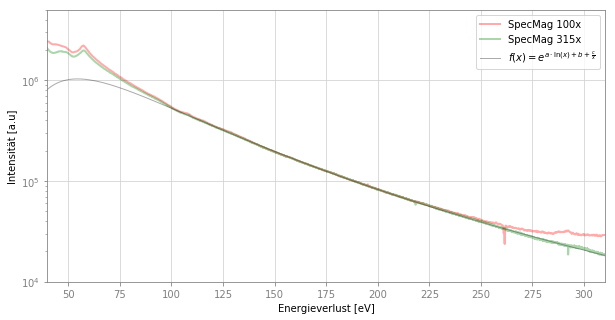

In [3]:
func = lambda x, a, b, c: np.exp(a * np.log(x) + 10*b - 100 * c / x)
power = lambda x, a, b: 10e9 * a * x**(-b)
intervall = df_sm315[(df_sm315.X >= 100) & (df_sm315.X <= 225)]
popt, pcov = scipy.optimize.curve_fit(func, intervall.X, intervall.Y, p0=(1, 1, 1))
#popt, pcov = scipy.optimize.curve_fit(power, intervall.X, intervall.Y, p0=(1, 1))
print(popt)
fit_x = np.linspace(max(df_sm100.X.min(), df_sm315.X.min()), min(df_sm100.X.max(), df_sm315.X.max()), 1000)
fit_y = [func(x, *popt) for x in fit_x]
#fit_y = [power(x, *popt) for x in fit_x]

plt.figure(figsize=(10,5))
plt.plot(df_sm100.X, df_sm100.Y, label='SpecMag 100x', lw=2, color='red', alpha=0.33)
plt.plot(df_sm315.X, df_sm315.Y, label='SpecMag 315x', lw=2, color='green', alpha=0.33)
plt.plot(fit_x, fit_y, label='$f(x)=e^{a\\cdot\\ln(x) + b + \\frac{c}{x}}$', lw=1, color='black', alpha=0.33)
plt.xlabel('Energieverlust [eV]')
plt.xlim(max(df_sm100.X.min(), df_sm315.X.min()), min(df_sm100.X.max(), df_sm315.X.max()))
plt.xticks(range(50, 301, 25))
plt.ylabel('Intensität [a.u]')
plt.yscale('log')
plt.ylim(1e4, 5e6)
plt.legend(loc='best')
plt.savefig('Bilder/EELS_SM100vsSM315')
plt.show()

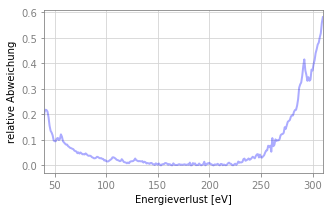

In [4]:
plt.figure(figsize=(5,3))
diff = round(df_sm100) - round(df_sm315)
diff.X = [key for key in diff.index]
plt.plot(diff.X, np.abs(diff.Y) / round(df_sm315).Y, lw=2, color='blue', alpha=0.33)
plt.xlabel('Energieverlust [eV]')
plt.xlim(max(df_sm100.X.min(), df_sm315.X.min()), min(df_sm100.X.max(), df_sm315.X.max()))
plt.ylabel('relative Abweichung')
plt.savefig('Bilder/EELS_SM100vsSM315_diff')
plt.show()

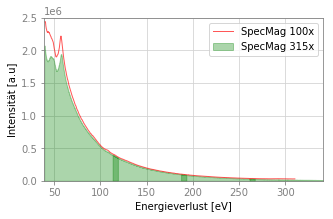

In [5]:
df_sm315_79eV = pd.read_csv('data/SM100vsSM315/SM315 79eV 15x0,5s.msa', names=('X', 'Y'), comment='#')
df_sm315_153eV = pd.read_csv('data/SM100vsSM315/SM315 153eV 15x0,5s.msa', names=('X', 'Y'), comment='#')
df_sm315_227eV = pd.read_csv('data/SM100vsSM315/SM315 227eV 15x0,5s.msa', names=('X', 'Y'), comment='#')
df_sm315_301eV = pd.read_csv('data/SM100vsSM315/SM315 301eV 15x0,5s.msa', names=('X', 'Y'), comment='#')

plt.figure(figsize=(5,3))
plt.plot(df_sm100.X, df_sm100.Y, label='SpecMag 100x', lw=1, color='red', alpha=0.66)
plt.fill_between(df_sm315_79eV.X, 0, df_sm315_79eV.Y, label='SpecMag 315x', color='green', alpha=0.33)
plt.fill_between(df_sm315_153eV.X, 0, df_sm315_153eV.Y, label='', color='green', alpha=0.33)
plt.fill_between(df_sm315_227eV.X, 0, df_sm315_227eV.Y, label='', color='green', alpha=0.33)
plt.fill_between(df_sm315_301eV.X, 0, df_sm315_301eV.Y, label='', color='green', alpha=0.33)
plt.xlabel('Energieverlust [eV]')
plt.xlim(min(df_sm100.X.min(), df_sm315.X.min()), max(df_sm100.X.max(), df_sm315.X.max()))
plt.ylim(0, 2500000)
plt.gca().get_yaxis().get_major_formatter().set_powerlimits((0, 1))
plt.ylabel('Intensität [a.u]')
plt.legend(loc='best')
plt.savefig('Bilder/EELS_SM100vsSM315_raw')
plt.show()